In [ ]:
import numpy as np
import pandas as pd
import trackpy as tp
import matplotlib.pyplot as plt

from src.FormatConversions import *
from src.Segmentation3D import get_voxel_size_35mm
from src.HolomonitorFunctions import get_pixel_size

In [2]:
vox_to_um = get_voxel_size_35mm()
pix_to_um = get_pixel_size()

In [ ]:
# # Holomonitor
# file = "B1-9"
# folder = "../data/Holomonitor/MDCK_16.05.2024/"
# im = import_holomonitor_stack(folder, file, f_min=1, f_max=145)

# unfiltered_df = pd.read_csv(f"{folder}{file}/area_volume_unfiltered.csv")
# areas = np.load(f"{folder}{file}/cell_areas.npy")
# search_range = 10

# Tomocube
file = "250210.113448.MDCK dynamics.001.MDCK B.A2"
folder = "../data/Tomocube/MDCK_10.02.2025/A2P1"
im, _ = import_tomocube_stack(folder, file, vox_to_um[0], f_min=1, f_max=40)

unfiltered_df = pd.read_csv(f"{folder}/area_volume_unfiltered.csv")
areas = np.load(f"{folder}/cell_areas.npy")
search_range = 50

In [91]:
A_min = 150
A_max = 2000
V_min = 1000
V_max = 12_500
h_min = 2
h_max = 17.5
h_mask = (unfiltered_df.h_avrg > h_min) * (unfiltered_df.h_max < h_max) 
A_mask = (unfiltered_df.A > A_min) * (unfiltered_df.A < A_max)
V_mask = (unfiltered_df.V > V_min) * (unfiltered_df.V < V_max)

mask = h_mask * A_mask * V_mask
filtered_df = unfiltered_df[mask]

print(f"Before filtering: {len(unfiltered_df)} cells")
print(f"After filtering:  {len(filtered_df)} cells")

Before filtering: 33935 cells
After filtering:  33054 cells


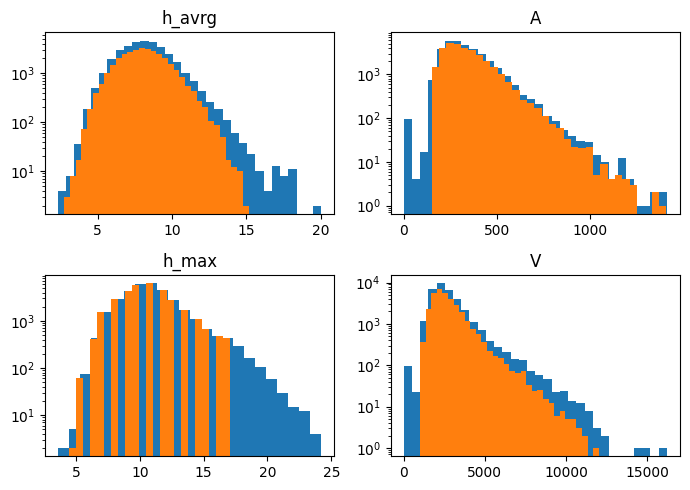

In [92]:
# filter area and volume
h_max = int(unfiltered_df.h_max.max())
fig, ax = plt.subplots(2,2, figsize=(7,5))

ax[0,0].hist(unfiltered_df.h_avrg, bins=32)
ax[0,0].hist(filtered_df.h_avrg,   bins=32)
ax[1,0].hist(unfiltered_df.h_max,  bins=24)#range=(0.5, h_max+0.5), bins=h_max+1)
ax[1,0].hist(filtered_df.h_max,    bins=23)#range=(0.5, h_max+0.5), bins=h_max+1)
ax[0,1].hist(unfiltered_df.A,      bins=32)
ax[0,1].hist(filtered_df.A,        bins=32)
ax[1,1].hist(unfiltered_df.V,      bins=32)
ax[1,1].hist(filtered_df.V,        bins=32)

ax[0,0].set(title="h_avrg", yscale="log")
ax[1,0].set(title="h_max",  yscale="log")
ax[0,1].set(title="A",      yscale="log")
ax[1,1].set(title="V",      yscale="log")
fig.tight_layout()

Before: 835
After:  806


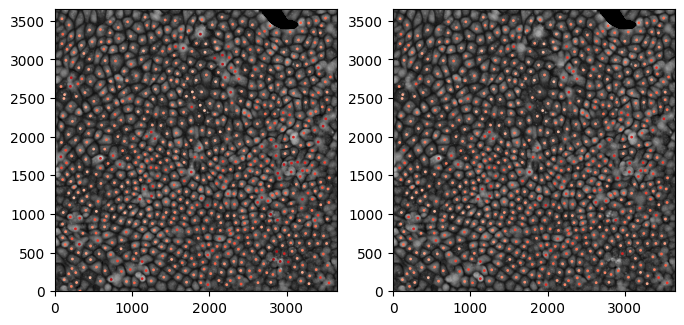

In [96]:
idx = 18

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(im[idx].T, origin="lower", cmap="gray", vmin=1.37);
ax[1].imshow(im[idx].T, origin="lower", cmap="gray", vmin=1.37);
ax[0].scatter(unfiltered_df[unfiltered_df.frame==idx].x, unfiltered_df[unfiltered_df.frame==idx].y, s=1, cmap="Reds", c=unfiltered_df[unfiltered_df.frame==idx].h_max, vmin=0, vmax=h_max)#, 'r.', ms=3);
ax[1].scatter(filtered_df[filtered_df.frame==idx].x, filtered_df[filtered_df.frame==idx].y, s=1, cmap="Reds", c=filtered_df[filtered_df.frame==idx].h_max, vmin=0, vmax=h_max)#, 'r.', ms=3);

print(f"Before: {len(unfiltered_df[unfiltered_df.frame==idx])}")
print(f"After:  {len(filtered_df[filtered_df.frame==idx])}")

835


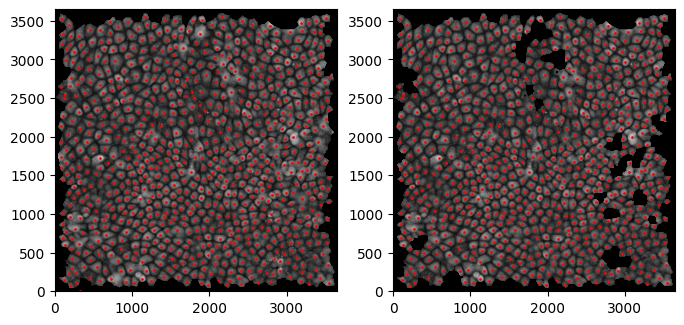

In [97]:
filtered_areas = np.copy(areas[idx])

for l in range(0, areas[idx].max()):
    if l not in filtered_df[filtered_df.frame==idx].label.values:
        filtered_areas[filtered_areas == l] = 0

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow((im[idx]*(areas[idx]>0)).T, origin="lower", cmap="gray", vmin=1.37);
ax[1].imshow((im[idx]*(filtered_areas>0)).T, origin="lower", cmap="gray", vmin=1.37);

ax[0].plot(unfiltered_df[unfiltered_df.frame==idx].x, unfiltered_df[unfiltered_df.frame==idx].y, 'r.', ms=2);
ax[1].plot(filtered_df[filtered_df.frame==idx].x, filtered_df[filtered_df.frame==idx].y, 'r.', ms=2);

print(sum(unfiltered_df.frame==idx))

In [ ]:
tracks = tp.link(filtered_df, search_range=search_range, memory=5)
tracks = tp.filter_stubs(tracks, threshold=5)

In [ ]:
tracks.to_csv(f"{folder}/area_volume_filtered.csv", index=False)

In [ ]:
'''
A1-9,12,18, B1-9:
A_min = 150
A_max = 2000
V_min = 1000
V_max = 10_000
h_min = 2
h_max = 18
'''

'''
B1-11
A_min = 150
A_max = 3000
V_min = 1000
V_max = 10_000
h_min = 2
h_max = 14
'''


'''
B2-5
A_min = 150
A_max = 3000
V_min = 1000
V_max = 20_000
h_min = 2
h_max = 18
'''